### Importando as bibliotecas

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sbn
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
from yellowbrick.regressor import ResidualsPlot

### Carregando os dados

In [2]:
df = pd.read_csv("Summary of Weather.csv", low_memory=False)
df.head()

,STA,Date,Precip,WindGustSpd,MaxTemp,MinTemp,MeanTemp,Snowfall,PoorWeather,YR,...,FB,FTI,ITH,PGT,TSHDSBRSGF,SD3,RHX,RHN,RVG,WTE
0,10001,1942-7-1,1.016,NaN,25.555556,22.222222,23.888889,0,NaN,42,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,10001,1942-7-2,0,NaN,28.888889,21.666667,25.555556,0,NaN,42,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,10001,1942-7-3,2.54,NaN,26.111111,22.222222,24.444444,0,NaN,42,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,10001,1942-7-4,2.54,NaN,26.666667,22.222222,24.444444,0,NaN,42,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,10001,1942-7-5,0,NaN,26.666667,21.666667,24.444444,0,NaN,42,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Separando as colunas de interesse

In [3]:
df = df[['MeanTemp', 'MaxTemp', 'MinTemp']].copy()
df.head()

,MeanTemp,MaxTemp,MinTemp
0,23.888889,25.555556,22.222222
1,25.555556,28.888889,21.666667
2,24.444444,26.111111,22.222222
3,24.444444,26.666667,22.222222
4,24.444444,26.666667,21.666667


### Analisando valores nulos e visualizando descrição

In [4]:
df.isna().sum()

MeanTemp    0
MaxTemp     0
MinTemp     0
dtype: int64

In [5]:
df.describe()

,MeanTemp,MaxTemp,MinTemp
count,119040.000000,119040.000000,119040.000000
mean,22.411631,27.045111,17.789511
std,8.297982,8.717817,8.334572
min,-35.555556,-33.333333,-38.333333
25%,20.555556,25.555556,15.000000
50%,25.555556,29.444444,21.111111
75%,27.222222,31.666667,23.333333
max,40.000000,50.000000,34.444444


### Visualizando a correlação entre as variáveis

In [6]:
df.corr()

,MeanTemp,MaxTemp,MinTemp
MeanTemp,1.000000,0.969048,0.965425
MaxTemp,0.969048,1.000000,0.878384
MinTemp,0.965425,0.878384,1.000000


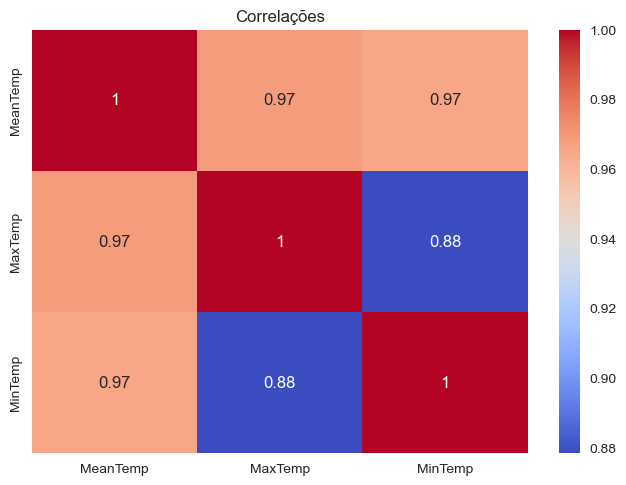

In [7]:
plt.title('Correlações')
sbn.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.show()

### Separando variáveis independentes e a variável dependente

In [8]:
x = df[['MinTemp', 'MeanTemp']].values
y = df.MaxTemp.values

### Dividinto em 70% treino e 20% teste

In [9]:
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=.7, random_state=80)

### Instanciando o modelo e treinando o modelo

In [10]:
model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

### Fazendo previsões com os dados de teste

In [11]:
y_pred = model.predict(x_test)
y_pred

array([24.02739737, 32.70121489, 29.02094303, ..., 21.48446382,
       28.52870142, 30.298652  ])

### Gerando um data frame de comparação dos valores reais VS as previsões

In [17]:
true_x_pred = pd.DataFrame({'y true': y_test, 'y pred': y_pred})
true_x_pred.tail()

,y true,y pred
35707,22.222222,22.785253
35708,27.222222,27.426928
35709,21.111111,21.484464
35710,28.333333,28.528701
35711,30.555556,30.298652


### Verificando score e resíduos

In [13]:
model.score(x_train, y_train)

0.9875943384554806

In [14]:
r2_score(y_test, y_pred)

0.9860468366231505

In [15]:
mean_squared_error(y_test, y_pred)

1.0600852539128587

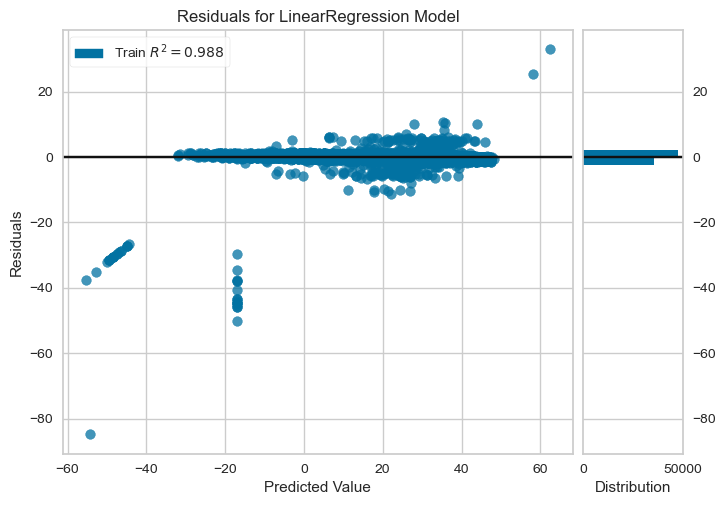

In [18]:
residuals = ResidualsPlot(model)
residuals.fit(x_train, y_train)
residuals.poof()
plt.show()